<a href="https://colab.research.google.com/github/Gh6if84vi/ML2024/blob/main/AIML_III_Module_2_Lab2_Principal_Components_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: Appreciating, Interpreting and Visualizing Data**

# Lab 2: Principal Components Analysis (PCA)

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

PCA is generally used for 2 applications:
1.   Visualization of high dimentional datasets.
2.   Reducing number of features, thereby speeding up ML algorithms.


We will be primarily focussing on the first application in this lab.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
# Loading the datasets
breast_data=load_breast_cancer().data
print("Features are:",breast_data.shape)
breast_labels=np.reshape(load_breast_cancer().target,(569,1))
print("Target:",breast_labels.shape)

Features are: (569, 30)
Target: (569, 1)


In [3]:
#Creating a Pandas dataframe for the dataset with the last column as target variable
final_breast_data=np.concatenate([breast_data,breast_labels],axis=1)
breast_dataset=pd.DataFrame(final_breast_data)
features=load_breast_cancer().feature_names
feature_labels=np.append(features,'label')
breast_dataset.columns=feature_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
#Dividing the values into the features and labels for conveniance at later stages
X=breast_dataset.iloc[:,:30].values #All rows,columns upto 29
y=breast_dataset.iloc[:,30].values #All rows and 30th column
print(np.shape(X),np.shape(y))


(569, 30) (569,)


**Step By Step Computation Of PCA**
The below steps need to be followed to perform dimensionality reduction using PCA:
1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set


**1. Standardization of the data**


---
It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and then apply scaling by doing fit_transform on the feature data. While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.



In [8]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
print(np.std(X_std))

1.0


Here's the data after scaling. Yes, we do loose the numerical meaning of the data, but that's okay. We are more interested in the relative positions of the data points with respect to each other.

In [10]:
X_std_df=pd.DataFrame(X_std)
X_std_df.colums=features
X_std_df.head()

<ipython-input-10-6e90a1dff5e0>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_std_df.colums=features


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**2. Computing the covariance matrix**


---
Recall that covariance is always measured between 2 dimensions. If we have a data set with more than 2 dimensions, there is more than one covariance measurement that can be calculated. For example, from a 3 dimensional data set (dimensions x,y,z) you could calculate cov(x,y), cov(y,z) and cov(x,z). In fact, for an n-dimensional data set, you can calculate N combinatorial 2 different covariances.

Here we have 30 different features, so we will have to compute 435 different covariances.




In [11]:
mean_vec=np.mean(X_std,axis=0)
# # Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)
cov_mat=1/(X_std.shape[0]-1)*(X_std-mean_vec).T.dot(X_std-mean_vec)
print("Covariance matrix for first 5 rows and columns:")
print(cov_mat[0:5,0:5])

Covariance matrix for first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


In [12]:
cov_mat.shape

(30, 30)

perhaps simpler way to do this is by using the numpy's covariance module "np.cov". However note that it takes as input the feature matrix with features in different rows, so in our application, we would be taking a transpose of the feature matrix before applying np.cov()

In [14]:
cov_mat_numpy=np.cov(X_std.T)
print("Covariance matrix for first 5 rows and columns:")
print(cov_mat_numpy[0:5,0:5])

Covariance matrix for first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


**3. Calculating the eigenvectors and eigenvalues**


---
Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data.




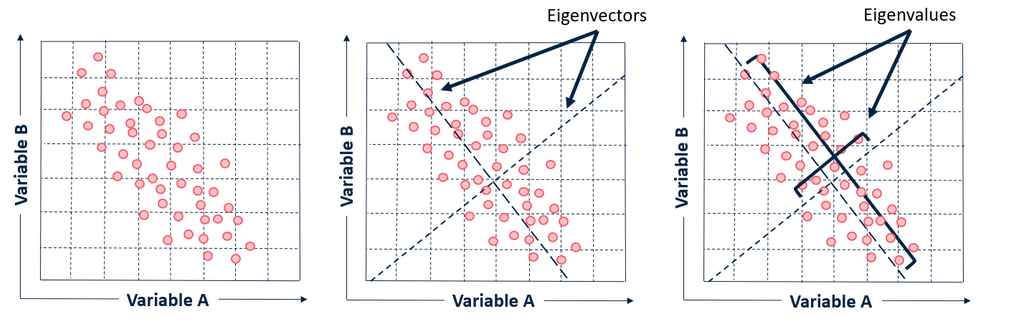

See how one of the eigenvectors goes through the middle of the points, like drawing a line of best fit? That eigenvector is showing us how these two data sets are related along that line. The second eigenvector gives us the other, less important, pattern in the data, that all the points follow the main line, but are off to the side of the main line by some amount.

So, by this process of taking the eigenvectors of the covariance matrix, we have been able to extract lines that characterise the data.

In [15]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)


In [16]:
eig_vals.shape,eig_vecs.shape

((30,), (30, 30))

**4. Computing the Principal Components**


---



Explained variance:
[44.27202560752635, 18.971182044033085, 9.393163257431393, 6.602134915470151, 5.495768492346255, 4.0245220398833546, 2.250733712982508, 1.5887238000213262, 1.3896493745591088, 1.1689781894131472, 0.9797189875980173, 0.870537900737884, 0.8045249871967302, 0.5233657454926353, 0.31378321676273985, 0.26620933651523176, 0.19799679253242683, 0.17539594502263636, 0.1649253059225157, 0.10386467483387138, 0.0999096463700257, 0.09146467510543423, 0.08113612588991044, 0.06018335666716721, 0.05160423791652017, 0.02725879954774855, 0.0230015462505957, 0.005297792903809204, 0.0024960103246895395, 0.00044348274273613787]
Cumulative explained variance:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.

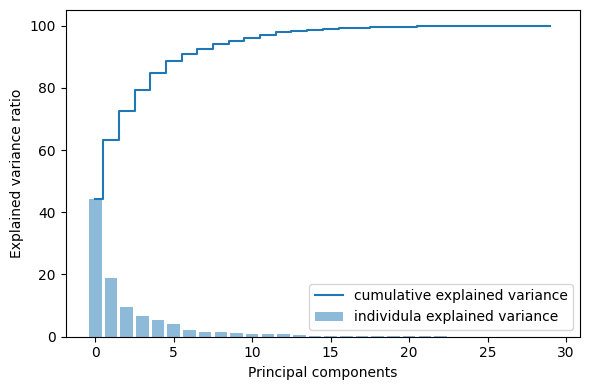

In [19]:
eig_pairs=[(np.abs(eig_vals[i]),np.abs(eig_vecs[:,i])) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x:x[0],reverse=True)
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print("Explained variance:")
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

#Plotting the variance explained by each component and the cumulative variance explained
plt.figure(figsize=(6,4))
plt.bar(range(30),var_exp,alpha=0.5,align="center",label="individula explained variance")
plt.step(range(30),cum_var_exp,where="mid",label="cumulative explained variance")
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

So, the first principal component alone explains more than 40% variance in the dataset. Also note that considering all the 30 dimensions explains 100% of the variance in the dataset as expected.

Choosing a suitable number of components for further visualizations is generally based on the cumulative sum of PCs. The first 2 PCs explain nearly 65% variance, and the first 3 explain close to 75% variance.

Lets now try and reduce the dimensions of our dataset to the first 2 and 3 principal components

**5. Reducing the dimensions of the data set**

---



In [20]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_std.dot(matrix_w)

print(Y)

[[ 9.19283683  7.7245987   6.29999834]
 [ 2.3878018   1.29141566 -0.46826442]
 [ 5.73389628  3.89840766  2.79219544]
 ...
 [ 1.25617928  0.17585678 -0.20638816]
 [10.37479406  8.21003035  6.5367354 ]
 [-5.4752433  -4.67146724 -2.74227549]]


Now, that you have spent such a long time building this final matrix Y which has reduced each datapoint to 3 dimensions......


In [21]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[ 9.19283686  1.94858264 -1.12316938]
 [ 2.38780183 -3.76817222 -0.52929705]
 [ 5.73389629 -1.0751739  -0.55174849]
 ...
 [ 1.25617926 -1.90229651  0.56273212]
 [10.37479404  1.67201037 -1.87702719]
 [-5.47524325 -0.67063752  1.49043717]]


**Let's visualize our dataset in 2 and 3 dimensions now**

---



In [22]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):

    dicti = dict()

    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


final_df.head()

,PC1,PC2,PC3,Label
0,9.192837,7.724599,6.299998,Benign
1,2.387802,1.291416,-0.468264,Benign
2,5.733896,3.898408,2.792195,Benign
3,7.122953,9.054307,9.016340,Benign
4,3.935302,2.819815,1.567559,Benign


In [23]:
import plotly.graph_objects as go
import plotly.express as px

In [24]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")

#Question:
**Referring to the plot above, can you reason why PCA can be a good candidate before training models for Machine learning?**
Answer:


 You can see that the first 2 principal components were able to differentiate the benign and malignant tumours in our breast cancer dataset. This motivates the use of the second application of PCA, which was to reduce the number of features in the dataset so that the machine learning algorithm can be trained without overfitting.

Let us now try and visualize this in the first 3 Principal Components space.




In [25]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

Exersise

1.How many components do you need to retain 90% of the variance in the data?

   ----->1 component

2.Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.

    ------>Compression of Image